In [1]:
import numpy as np
import pandas as pd

# Load the dataset into a pandas dataframe and display the first 10 rows of the dataframe to gain familiarity with the data structure.

In [2]:
# load and inspect the dataset
students_df = pd.read_csv("StudentsPerformance.csv")
students_df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


# Perform exploratory data analysis:
Check for missing values and handle them accordingly (if any). - Check for outliers and handle them accordingly (if any).
Provide a brief summary of your data, such as descriptive statistics and data types.

In [3]:
students_df.shape

(1000, 8)

In [4]:
df_shape = students_df.shape
print(f"Columns:{df_shape[1]}\nRows:{df_shape[0]}")

Columns:8
Rows:1000


In [5]:
students_df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [6]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
students_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Outliers

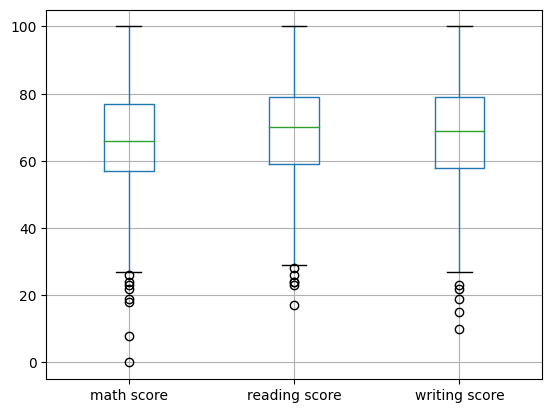

In [8]:
import matplotlib.pyplot as plt

# Create box plots for numerical columns
numerical_columns = ['math score', 'reading score', 'writing score']
students_df[numerical_columns].boxplot()

# Show the box plots
plt.show()


In [9]:
# Calculate the IQR for numerical columns
Q1 = students_df[numerical_columns].quantile(0.25)
Q3 = students_df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((students_df[numerical_columns] < lower_bound) | (students_df[numerical_columns] > upper_bound)).any(axis=1)
outlier_data = students_df[outliers]


In [10]:
outlier_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
76,male,group E,some high school,standard,none,30,26,22
145,female,group C,some college,free/reduced,none,22,39,33
211,male,group C,some college,free/reduced,none,35,28,27
327,male,group A,some college,free/reduced,none,28,23,19
338,female,group B,some high school,free/reduced,none,24,38,27
466,female,group D,associate's degree,free/reduced,none,26,31,38
596,male,group B,high school,free/reduced,none,30,24,15
787,female,group B,some college,standard,none,19,38,32


# Removing Outliers from the data

In [11]:
Clean_data = students_df[~outliers]

In [12]:
Clean_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# Perform data visualization:
Create a bar plot to show the distribution of male and female students in the dataset.

Create a histogram to show the distribution of the scores in math, reading, and writing.

Create a bar plot to show the average scores in math, reading, and writing for each gender.

Create a scatter plot to show the relationship between math, reading, and writing scores.

## Create a bar plot to show the distribution of male and female students in the dataset.

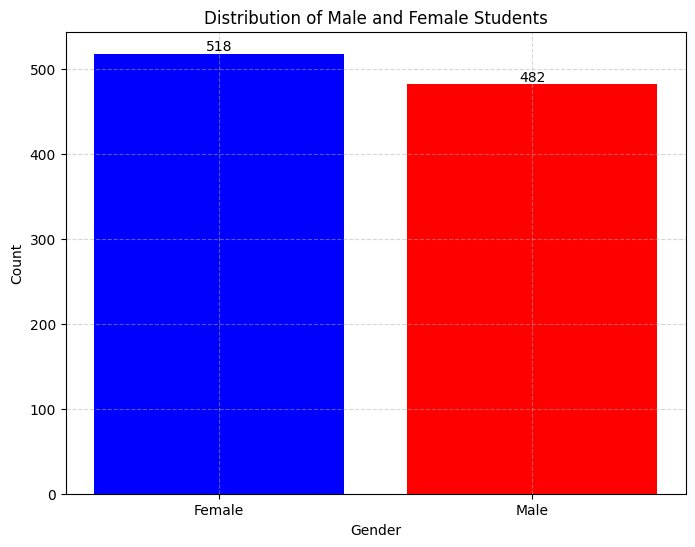

In [16]:
gender_counts = students_df['gender'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values, color=['b', 'r'])

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Male and Female Students')
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid with dashed lines and transparency
plt.xticks(gender_counts.index, ['Female', 'Male'])  # Replace x-axis ticks with labels

# Add labels on top of each bar
for i, count in enumerate(gender_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


## Create a histogram to show the distribution of the scores in math, reading, and writing.

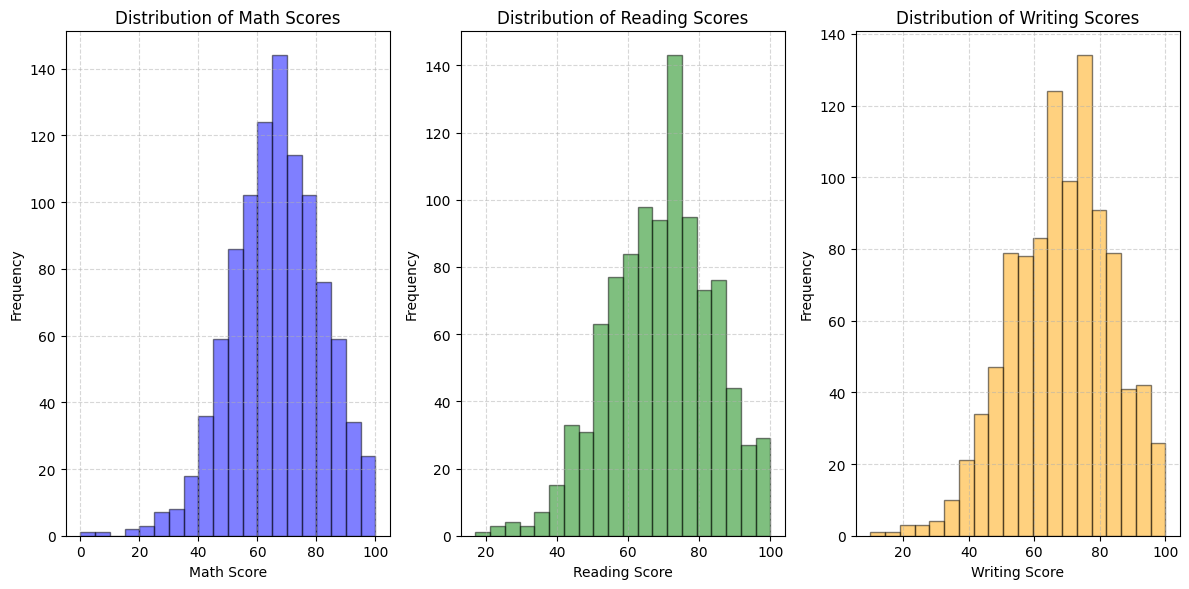

In [21]:
plt.figure(figsize=(12, 6))

# Math score histogram
plt.subplot(1, 3, 1)
plt.hist(students_df['math score'], bins=20, alpha=0.5, color='blue', edgecolor='black')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.title('Distribution of Math Scores')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Reading score histogram
plt.subplot(1, 3, 2)
plt.hist(students_df['reading score'], bins=20, alpha=0.5, color='green', edgecolor='black')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')
plt.title('Distribution of Reading Scores')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Writing score histogram
plt.subplot(1, 3, 3)
plt.hist(students_df['writing score'], bins=20, alpha=0.5, color='orange', edgecolor='black')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')
plt.title('Distribution of Writing Scores')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


## Create a bar plot to show the average scores in math, reading, and writing for each gender.

C:\Users\nafem\AppData\Local\Temp\ipykernel_7008\4129575137.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gender_avg_scores = students_df.groupby('gender')['math score', 'reading score', 'writing score'].mean()


<Figure size 1200x800 with 0 Axes>

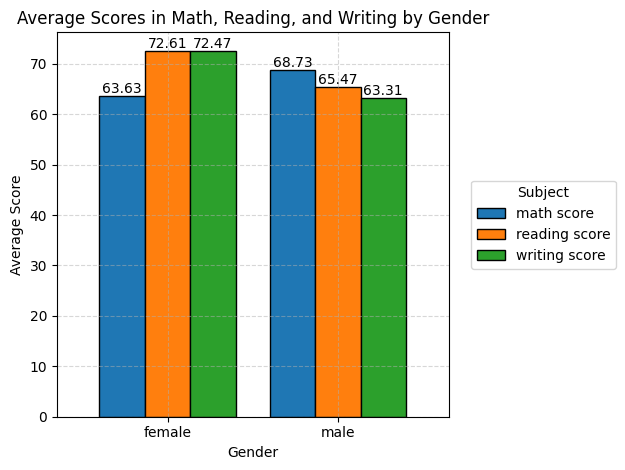

In [29]:
gender_avg_scores = students_df.groupby('gender')['math score', 'reading score', 'writing score'].mean()
plt.figure(figsize=(12, 8))

ax = gender_avg_scores.plot(kind='bar', edgecolor='black', linewidth=1, width=0.8)
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.title('Average Scores in Math, Reading, and Writing by Gender')
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.5)

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Move the legend outside the plot area
plt.legend(title='Subject', bbox_to_anchor=(1.04, 0.5), loc='center left')

plt.tight_layout()
plt.show()


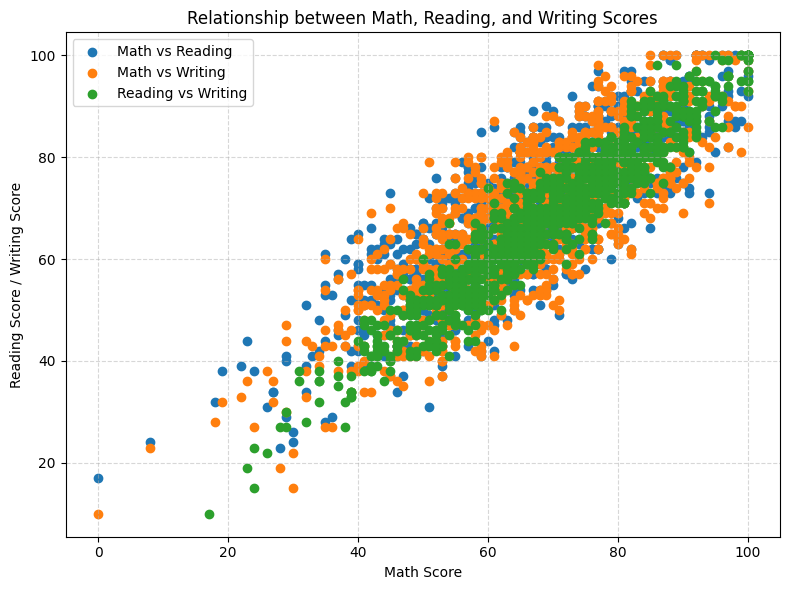

In [31]:
# Scatter plot: Relationship between math, reading, and writing scores
plt.figure(figsize=(8, 6))
plt.scatter(students_df['math score'], students_df['reading score'], label='Math vs Reading')
plt.scatter(students_df['math score'], students_df['writing score'], label='Math vs Writing')
plt.scatter(students_df['reading score'], students_df['writing score'], label='Reading vs Writing')
plt.xlabel('Math Score')
plt.ylabel('Reading Score / Writing Score')
plt.title('Relationship between Math, Reading, and Writing Scores')
plt.grid(True, linestyle='--', alpha=0.5)

# Adjust the legend position
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Perform basic statistical analysis:
Calculate mean, median, and mode for math, reading, and writing scores.
Calculate the standard deviation for math, reading, and writing scores.
Test if there's a significant difference between male and female students' performance in math, reading, and writing using an appropriate statistical test (e.g., t-test).

In [32]:
import numpy as np
from scipy import stats

# Mean, Median, and Mode
math_mean = np.mean(students_df['math score'])
reading_mean = np.mean(students_df['reading score'])
writing_mean = np.mean(students_df['writing score'])

math_median = np.median(students_df['math score'])
reading_median = np.median(students_df['reading score'])
writing_median = np.median(students_df['writing score'])

math_mode = stats.mode(students_df['math score'])
reading_mode = stats.mode(students_df['reading score'])
writing_mode = stats.mode(students_df['writing score'])

print(f"Mean - Math: {math_mean:.2f}, Reading: {reading_mean:.2f}, Writing: {writing_mean:.2f}")
print(f"Median - Math: {math_median:.2f}, Reading: {reading_median:.2f}, Writing: {writing_median:.2f}")
print(f"Mode - Math: {math_mode.mode[0]}, Reading: {reading_mode.mode[0]}, Writing: {writing_mode.mode[0]}")

# Standard Deviation
math_std = np.std(students_df['math score'])
reading_std = np.std(students_df['reading score'])
writing_std = np.std(students_df['writing score'])

print(f"Standard Deviation - Math: {math_std:.2f}, Reading: {reading_std:.2f}, Writing: {writing_std:.2f}")

# T-Test for comparing male and female scores
math_male = students_df[students_df['gender'] == 'male']['math score']
math_female = students_df[students_df['gender'] == 'female']['math score']

reading_male = students_df[students_df['gender'] == 'male']['reading score']
reading_female = students_df[students_df['gender'] == 'female']['reading score']

writing_male = students_df[students_df['gender'] == 'male']['writing score']
writing_female = students_df[students_df['gender'] == 'female']['writing score']

ttest_math = stats.ttest_ind(math_male, math_female)
ttest_reading = stats.ttest_ind(reading_male, reading_female)
ttest_writing = stats.ttest_ind(writing_male, writing_female)

print(f"T-Test - Math: p-value = {ttest_math.pvalue:.4f}")
print(f"T-Test - Reading: p-value = {ttest_reading.pvalue:.4f}")
print(f"T-Test - Writing: p-value = {ttest_writing.pvalue:.4f}")


Mean - Math: 66.09, Reading: 69.17, Writing: 68.05
Median - Math: 66.00, Reading: 70.00, Writing: 69.00
Mode - Math: 65, Reading: 72, Writing: 74
Standard Deviation - Math: 15.16, Reading: 14.59, Writing: 15.19
T-Test - Math: p-value = 0.0000
T-Test - Reading: p-value = 0.0000
T-Test - Writing: p-value = 0.0000


C:\Users\nafem\AppData\Local\Temp\ipykernel_7008\3531787533.py:13: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  math_mode = stats.mode(students_df['math score'])
C:\Users\nafem\AppData\Local\Temp\ipykernel_7008\3531787533.py:14: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this